In [1]:
#Test to figure out how much data is needed for training
import mne
import scipy.io as sp
import numpy as np
import random
import pandas as pd
import multiprocessing as mp
import concurrent.futures
from mne.decoding import CSP
import pymrmr
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import logging
import numpy as np

In [4]:
rf = pd.read_csv('AverageAcc.csv')
blk = 'b'+str(1)
gf = rf[blk][2]
print(gf)

0.6509482941301123


6 6
5 5
4 4
3 3


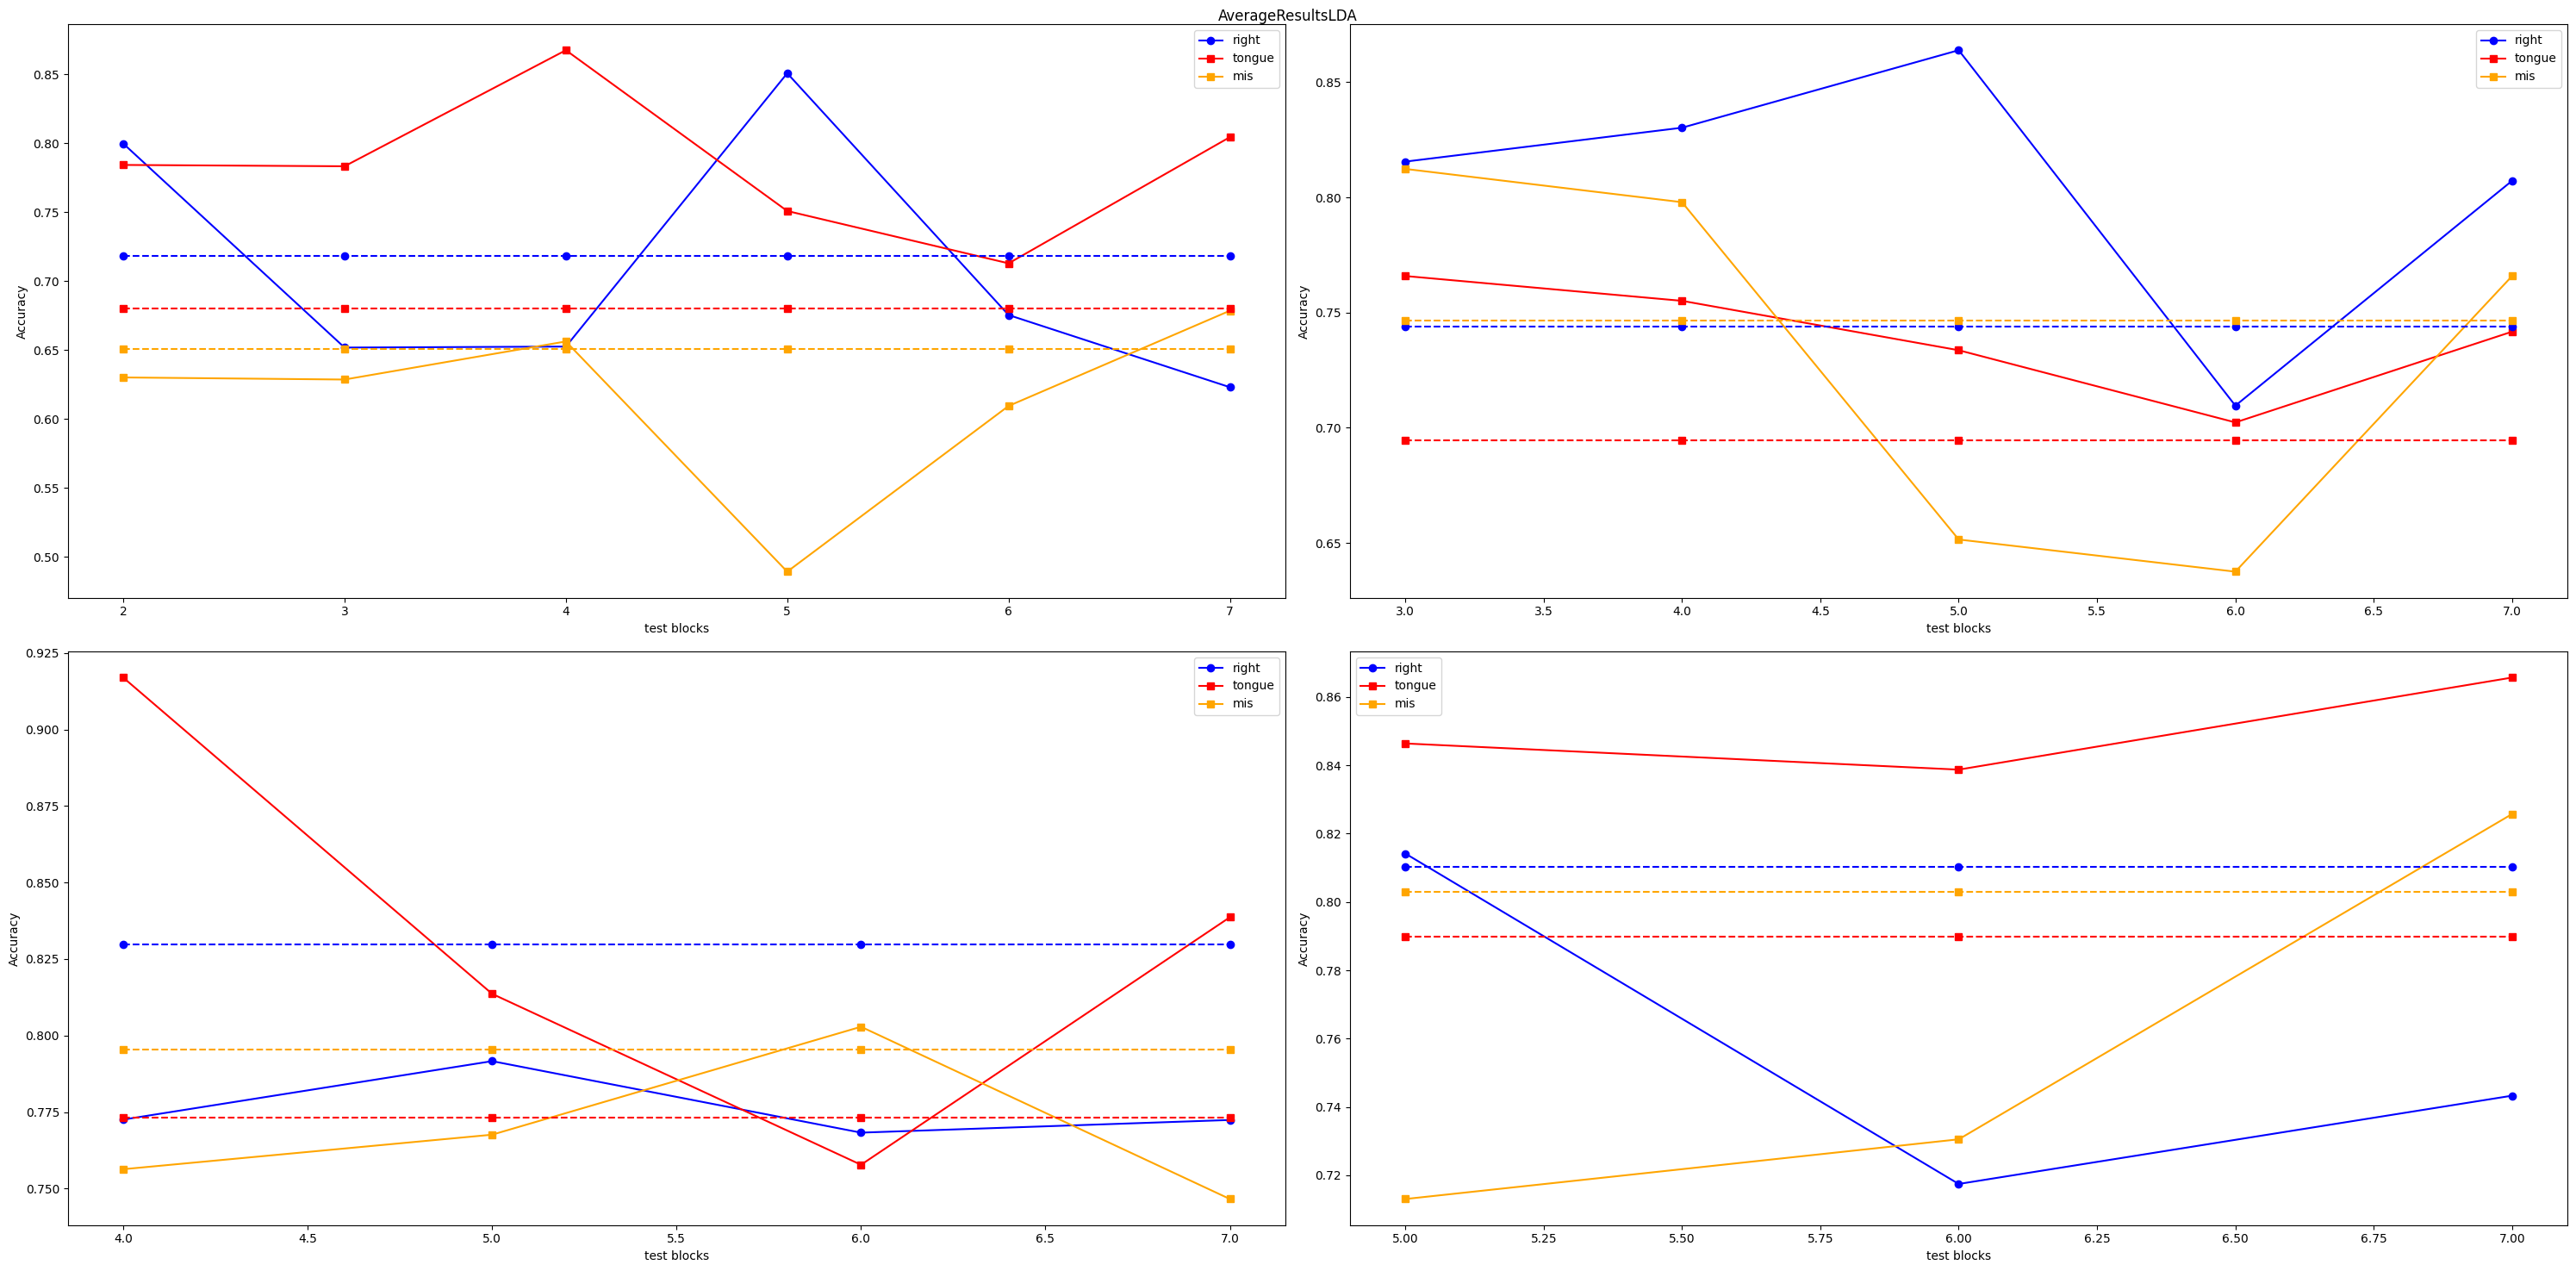

In [2]:
cf = pd.read_csv('AverageResults.csv')
rf = pd.read_csv('AverageAcc.csv')
trblk_list = [1,12,123,1234]
i = 0
j = 0
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))
for trblk in trblk_list:
    df = cf.copy()
    vf = rf.copy()
    cutdf_right = df[(df['train_block'] == trblk) & (df['class1'] == 'Right')]
    cutdf_tongue = df[(df['train_block'] == trblk) & (df['class1'] == 'Tongue')]
    cutdf_mis = df[(df['train_block'] == trblk) & (df['class1'] == 'Mis')]
    
    right_acc = cutdf_right["test_acc"].tolist()
    tongue_acc = cutdf_tongue["test_acc"].tolist()
    mis_acc = cutdf_mis["test_acc"].tolist()
    x_axes = cutdf_mis["test_block"].tolist()
    
    x = x_axes
    print(len(x),len(right_acc))
    blk = 'b'+str(trblk)
    y1 = right_acc
    y2 = tongue_acc
    y3 = mis_acc
    y4 = np.full(len(x), vf[blk][0])
    y5 = np.full(len(x), vf[blk][1])
    y6 = np.full(len(x), vf[blk][2]) 
    
    if trblk == 1:
        i=0
        j=0
    elif trblk == 12:
        i=0
        j=1
    elif trblk == 123:
        i=1
        j=0
    else:
        i=1
        j=1
    axes[i,j].plot(x, y1, label='right', color='blue', marker='o')
    axes[i,j].plot(x, y2, label='tongue', color='red', marker='s')
    axes[i,j].plot(x, y3, label='mis', color='orange', marker='s')
    axes[i,j].plot(x, y4, color='blue', marker='o',linestyle='--')
    axes[i,j].plot(x, y5, color='red', marker='s',linestyle='--')
    axes[i,j].plot(x, y6, color='orange', marker='s',linestyle='--') 
    axes[i,j].legend()
    axes[i,j].set_xlabel('test blocks')
    axes[i,j].set_ylabel('Accuracy')    

fig.suptitle('AverageResultsLDA')
plt.tight_layout()

plt.show()
fig.savefig('AverageResultsLDA.jpg', dpi=300)


In [2]:
# for num in range(2,7):
#     if num!=9:
#         rf = pd.read_csv("P"+str(num)+".csv")
#         vf = pd.read_csv("ResultsOfAll1.csv")
#         cf = pd.concat([vf, rf], ignore_index=True)
#         cf.to_csv('ResultsOfAll1.csv',index=False)

    

In [53]:
# vf = pd.read_csv('ResultsOfAll1.csv')
# af = vf[(vf['train_block'] == 1)]
# bf = vf[(vf['train_block'] == 12)]
# cf = vf[(vf['train_block'] == 123)]
# ef = vf[(vf['train_block'] == 1234)]

# AllResults_Organized = pd.concat([af, bf, cf, ef], axis=0, ignore_index=True)


In [3]:
# AllResults_Organized.tail()

In [55]:
# AllResults_Organized.to_csv("AllResults_Organized.csv",index=False)

In [ ]:
# df = pd.read_csv('AllResults_Organized.csv')
# gf = df[(df['train_block'] == blk) & (df['class1'] == 'right')]
# avg = gf['test_acc'].mean()

In [3]:
columnNames = ['participant', 'class1', 'class2', 'running_time', 'test_acc', 'train_acc', 'test_size', 'train_size', 'train_block','test_block']
# kf = pd.DataFrame(columns=columnNames)
# kf.to_csv('ResultsOfAll.csv', index=False)

vf = pd.DataFrame(columns=columnNames)  # Create an empty DataFrame

for num in range(2, 16):
    if num!=9:
        rf = pd.read_csv("P" + str(num) + ".csv")
        vf = pd.concat([vf, rf], ignore_index=True)

vf.to_csv('ResultsOfAll.csv', index=False)
vf.tail()

,participant,class1,class2,running_time,test_acc,train_acc,test_size,train_size,train_block,test_block
697,15,Tongue,Rest,63.525536,0.80,0.9625,"(20, 64, 1123)","(80, 64, 1123)",1234,6
698,15,Mis,Rest,63.612167,0.60,0.9875,"(20, 64, 1123)","(80, 64, 1123)",1234,6
699,15,Right,Rest,63.557912,0.55,1.0000,"(20, 64, 1123)","(80, 64, 1123)",1234,7
700,15,Tongue,Rest,62.999121,0.80,0.9625,"(20, 64, 1123)","(80, 64, 1123)",1234,7
701,15,Mis,Rest,63.010100,0.75,0.9875,"(20, 64, 1123)","(80, 64, 1123)",1234,7


In [2]:

# Concatenate both dataframes along the 'a' column
# df2 = df2.drop(columns=['b'])
# df1 = df1.drop(columns=['b'])
column_names = ['participant', 'class1', 'class2','running_time','test_acc','train_acc','test_size','train_size','train_block','test_block']
# temp = pd.read_csv("temp.csv")
df1 = pd.read_csv("P2.csv")
df2 = pd.read_csv("P3.csv")

df1["participant"] = "All"
df2["participant"] = "All"
df1[["train_size","test_size"]] = "null"
df2[["train_size","test_size"]] = "null"   
df3 = pd.merge(df1, df2, on=["participant","class1","class2","test_size","train_size","train_block","test_block"])

# df3.tail()
# train_size

df3['test_acc'] = (df3['test_acc_x'] + df3['test_acc_y']) / 2
df3['train_acc'] = (df3['train_acc_x'] + df3['train_acc_y']) / 2
df3['running_time'] = (df3['running_time_x'] + df3['running_time_y']) / 2

# df3.tail()

df3 = df3.drop(columns=['test_acc_x', 'test_acc_y','train_acc_x','train_acc_y','running_time_x','running_time_y'])
df3 = df3[column_names]
temp = df3
temp.to_csv("temp.csv",index=False)


# # Calculate the average of 'c' column for each unique value in 'a' column
# df3 = df3.groupby(df3.index).transform('mean')
# df3.head()
# # # Rename the columns
# # df3 = df3.reset_index(drop=True)
# # df3.columns = ['a', 'c']

# print(df3)


In [3]:
column_names = ['participant', 'class1', 'class2','running_time','test_acc','train_acc','test_size','train_size','train_block','test_block']
p_num_list = [4,5,6,7,8,10,11,12,13,14,15]
for p_num in p_num_list:
    print(p_num)
    temp = pd.read_csv("temp.csv")
    df1 = temp.copy()
    df2 = pd.read_csv("P"+str(p_num)+".csv")
    df1["participant"] = "All"
    df2["participant"] = "All"
    df1[["train_size","test_size"]] = "null"
    df2[["train_size","test_size"]] = "null"    
    df3 = pd.merge(df1, df2, on=["participant","class1","class2","test_size","train_size","train_block","test_block"])

# df3.head()

    df3['test_acc'] = (df3['test_acc_x'] + df3['test_acc_y']) / 2
    df3['train_acc'] = (df3['train_acc_x'] + df3['train_acc_y']) / 2
    df3['running_time'] = (df3['running_time_x'] + df3['running_time_y']) / 2
# df3.head()

    df3 = df3.drop(columns=['test_acc_x', 'test_acc_y','train_acc_x','train_acc_y','running_time_x','running_time_y'])
    df3 = df3[column_names]
    temp = df3
    temp.to_csv("temp.csv",index=False)



# # Calculate the average of 'c' column for each unique value in 'a' column
# df3 = df3.groupby(df3.index).transform('mean')
# df3.head()
# # # Rename the columns
# # df3 = df3.reset_index(drop=True)
# # df3.columns = ['a', 'c']

# print(df3)


4
5
6
7
8
10
11
12
13
14
15


In [7]:
temp = df3
temp.to_csv("AverageResults.csv",index=False)

In [8]:
df = pd.read_csv('P5.csv')
df = df.drop(df.index[-1])
df.to_csv('P5.csv',index=False)
df.tail()

,participant,class1,class2,running_time,test_acc,train_acc,test_size,train_size,train_block,test_block
48,5,Right,Rest,99.401573,0.70,1.0000,"(20, 64, 1123)","(80, 64, 1123)",1234,6
49,5,Tongue,Rest,99.681966,0.80,1.0000,"(20, 64, 1123)","(80, 64, 1123)",1234,6
50,5,Mis,Rest,98.340379,0.85,0.9875,"(20, 64, 1123)","(80, 64, 1123)",1234,6
51,5,Right,Rest,100.060704,0.80,1.0000,"(20, 64, 1123)","(80, 64, 1123)",1234,7
52,5,Tongue,Rest,98.158014,0.95,1.0000,"(20, 64, 1123)","(80, 64, 1123)",1234,7


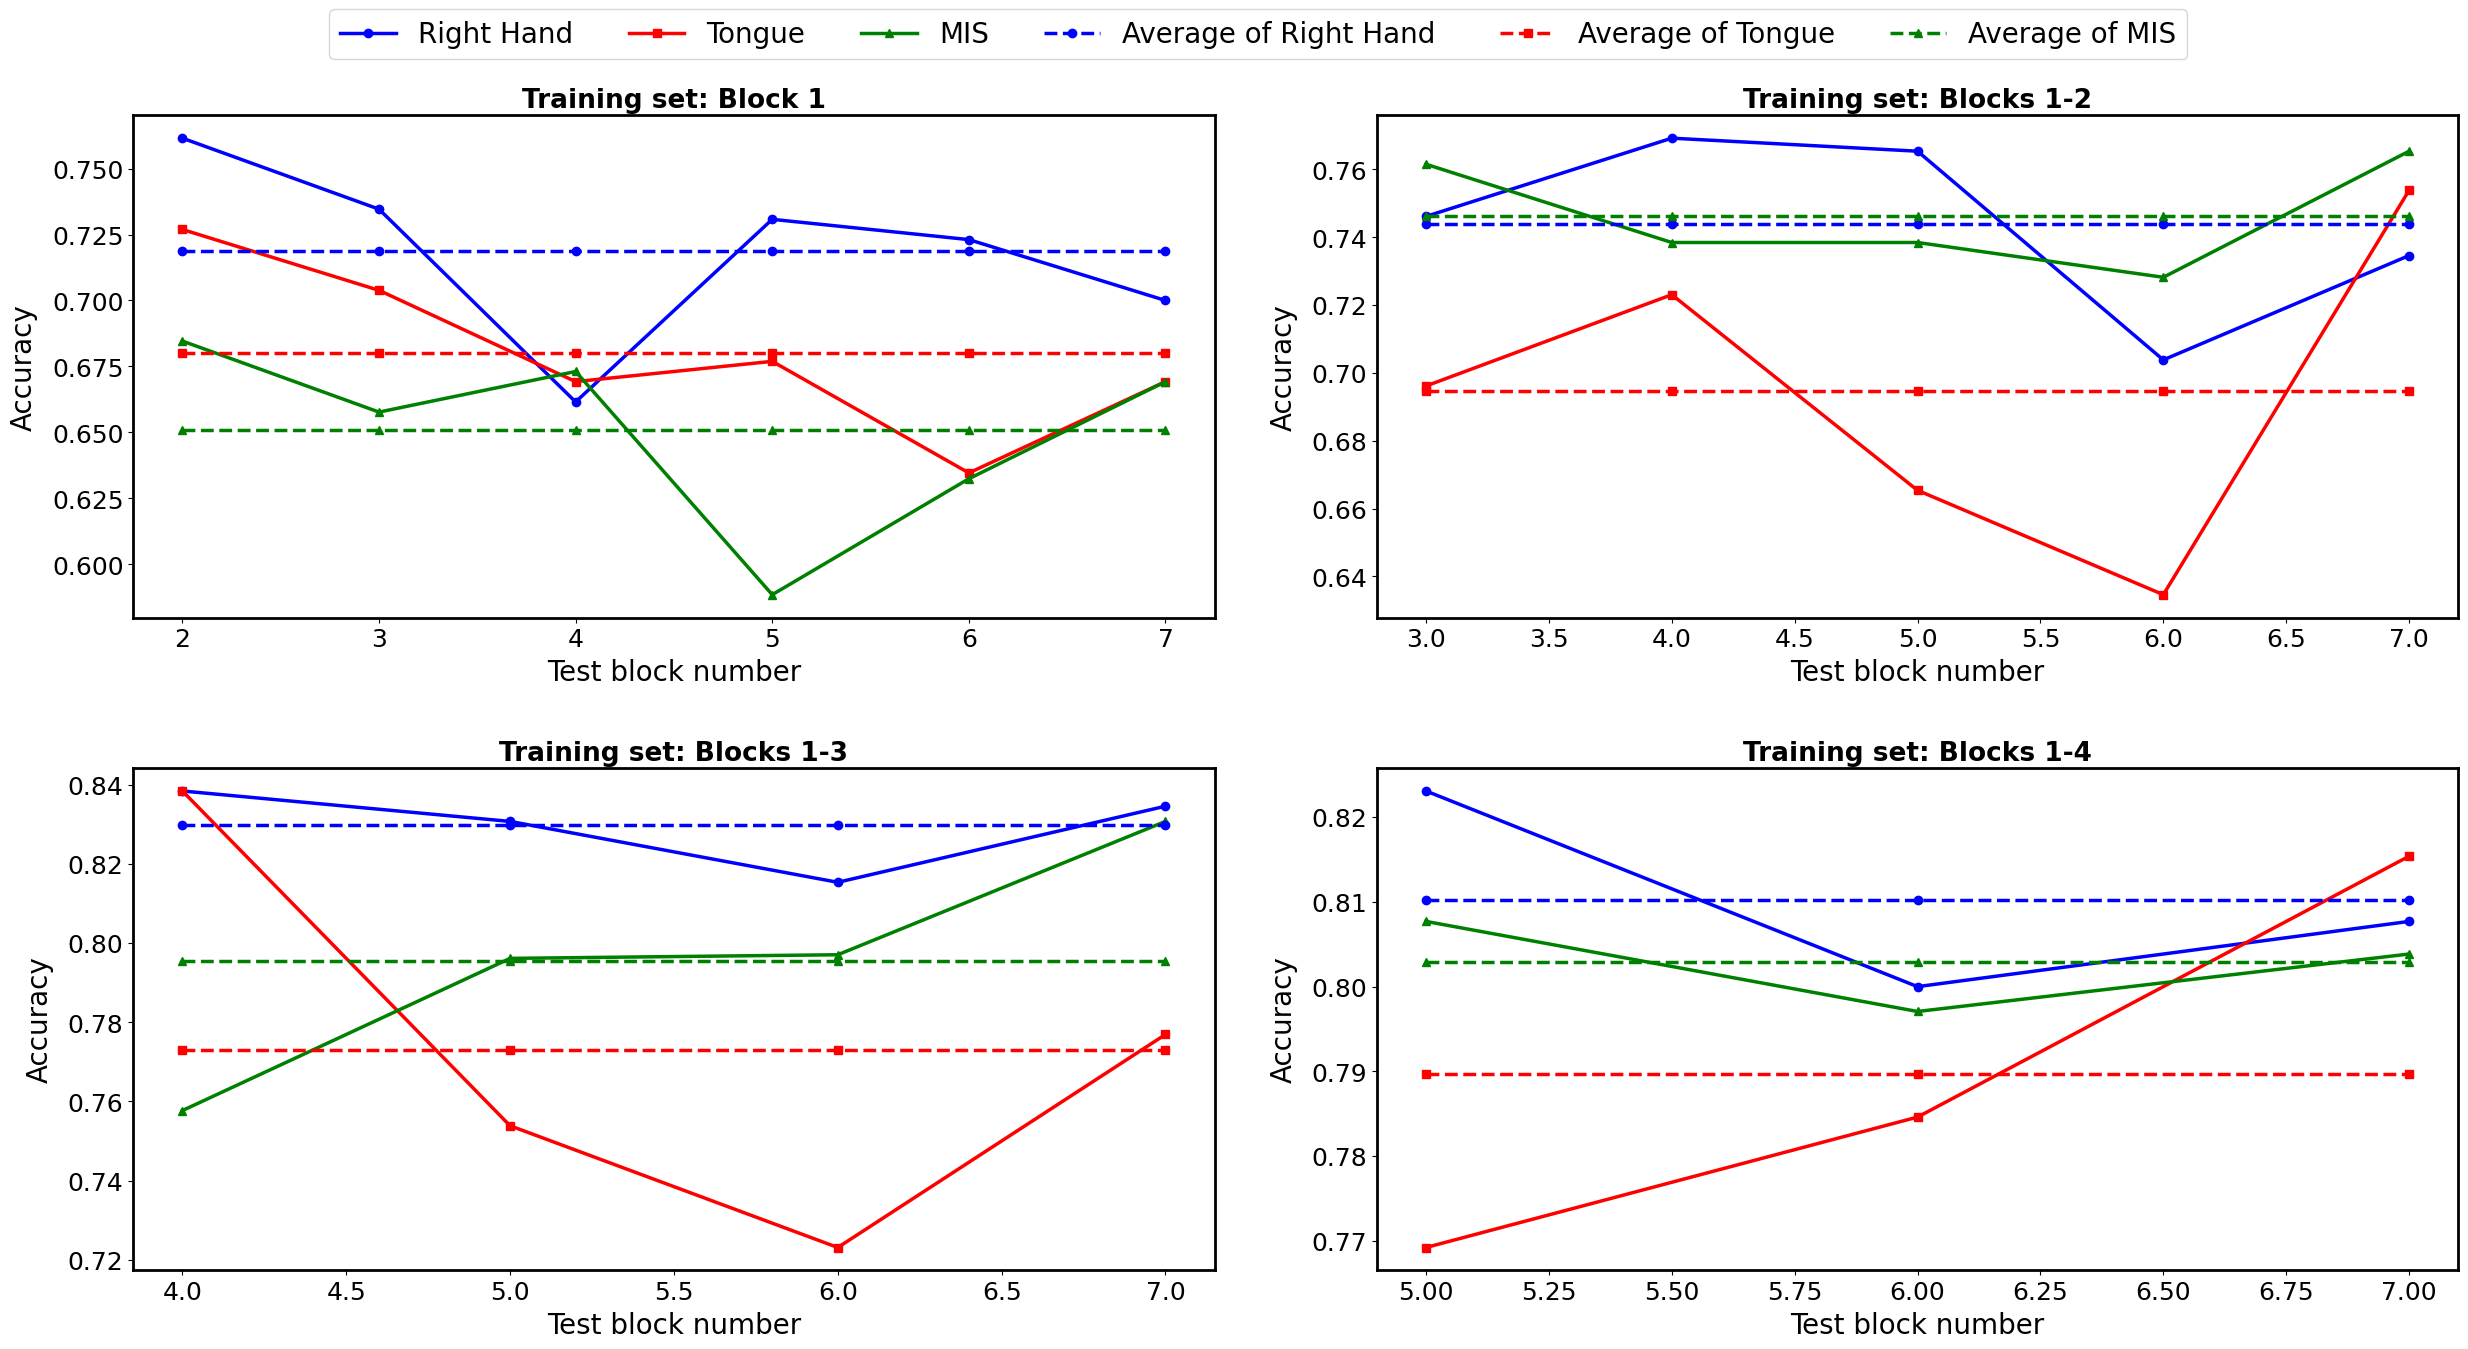

0.8028693528693528


In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))


cf = pd.read_csv('ResultsOfAll.csv')
rf = pd.read_csv('AverageAcc.csv')

class_list=['Right','Tongue','Mis']   
trblk_name_list = [1,12,123,1234]
num_classes = num_classes = len(class_list)
trblknum = 1

for trblk_name in trblk_name_list:
    num_test_blocks = 7-trblknum
    list_acc = np.zeros((num_classes, num_test_blocks))
    l=0
    for class_ in class_list:
        m=0
        for teblk in range(trblknum+1,8):
            df = cf.copy()
            jf = df[(df['train_block'] == trblk_name) & (df['class1'] == class_)]
            kf = jf[jf['test_block']==teblk]['test_acc']
            avg = kf.mean()
            list_acc[l,m] = avg
            m+=1
        l+=1
    
    if trblk_name == 1:
        i=0
        j=0
        title = "Training set: Block 1"
    elif trblk_name == 12:
        i=0
        j=1
        title = "Training set: Blocks 1-2"
    elif trblk_name == 123:
        i=1
        j=0
        title = "Training set: Blocks 1-3"
    else:
        i=1
        j=1
        title = "Training set: Blocks 1-4"
    
    x = np.arange(trblknum+1,8)
    y1 = list_acc[0]
    y2 = list_acc[1]
    y3 = list_acc[2]
    vf = rf.copy()
    blk = 'b'+str(trblk_name)
    y4 = np.full(len(x), vf[blk][0])
    y5 = np.full(len(x), vf[blk][1])
    y6 = np.full(len(x), vf[blk][2]) 

    axes[i,j].plot(x, y1, color='blue', marker='o',linewidth=2.5)
    axes[i,j].plot(x, y2, color='red', marker='s',linewidth=2.5)
    axes[i,j].plot(x, y3, color='green', marker='^',linewidth=2.5)
    axes[i,j].plot(x, y4, color='blue', marker='o',linestyle='--',linewidth=2.5)
    axes[i,j].plot(x, y5, color='red', marker='s',linestyle='--',linewidth=2.5)
    axes[i,j].plot(x, y6, color='green', marker='^',linestyle='--',linewidth=2.5) 
    axes[i,j].xaxis.labelpad = 5  # Adjust the space for the x-axis label
    axes[i,j].yaxis.labelpad = 10 
    axes[i,j].set_xlabel('Test block number')
    axes[i,j].set_ylabel('Accuracy')   
    axes[i, j].set_title(title,fontweight='bold',fontsize=19)
    
    
    trblknum+=1 
    
# fig.suptitle('AverageResultsLDA')
plt.rcParams.update({
    'font.size': 20,  # Font size
    'axes.labelsize': 20,  # Correcting the axes label size
    'axes.titlesize': 15,  # Axes title size
    'xtick.labelsize': 18,  # X-axis tick label size
    'ytick.labelsize': 18,  # Y-axis tick label size
    'axes.linewidth': 2,  # Axes line width
})
# handles, labels = [], []
# for ax in axes.flatten():
#     h, l = ax.get_legend_handles_labels()
#     handles.extend(h)
#     labels.extend(l)
labels = ['Right Hand','Tongue','MIS','Average of Right Hand ','Average of Tongue','Average of MIS']
fig.legend(labels,ncol=6,loc='upper center',bbox_to_anchor=(0.5, 0.96))
plt.subplots_adjust(wspace=0.15, hspace=0.3) 

# plt.tight_layout(pad=2.0)
plt.show()
fig.savefig('AverageResultsLDA.svg', dpi=600)

print(np.mean(list_acc[2]))


In [53]:
        jf = df[(df['train_block'] == 1) & (df['class1'] == class_)]
        kf = jf[jf['test_block']==teblk]['test_acc']
        kf.head()

17     0.80
71     0.65
125    0.50
179    0.65
233    0.60
Name: test_acc, dtype: float64

In [56]:

print()

[2 3 4 5 6 7]
